<a href="https://colab.research.google.com/github/pradnyasangoram/Machine-Learning-Model-for-Medical-Image-Segmentation-/blob/main/DataUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
import numpy as np
import time

from skimage.io import imsave, imread

# path to images dataset. Recommended to write down entire path to avoid errors (i.e "C:/User/Desktop.../raw/)
data_path = '/content/drive/My Drive/Converted_Image'

image_rows = 384
image_cols = 384


def create_train_data():
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img = imread(os.path.join(train_data_path, image_name))
        img_mask = imread(os.path.join(train_data_path, image_mask_name))

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_validate_data():
    validate_data_path = os.path.join(data_path, 'validate')
    images = os.listdir(validate_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img_val_id = int(image_name.split('.')[0])
        img = imread(os.path.join(validate_data_path, image_name))
        img_mask = imread(os.path.join(validate_data_path, image_mask_name))

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_validate.npy', imgs)
    np.save('imgs_mask_validate.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_validate_data():
    imgs_validate = np.load('imgs_validate.npy')
    imgs_mask_validate = np.load('imgs_mask_validate.npy')
    return imgs_validate, imgs_mask_validate


def create_test_data():
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int64)

    i = 0
    print('-'*30)
    print('Creating testing images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(test_data_path, image_name))
        img_mask = imread(os.path.join(test_data_path, image_mask_name))

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', imgs_mask)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_mask_test = np.load('imgs_mask_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id, imgs_mask_test

if __name__ == '__main__':
    start_time = time.time()
    create_train_data()
    create_validate_data()
    create_test_data()
    print("--- %s seconds ---create NPY files" % (time.time() - start_time))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
------------------------------
Creating training images...
------------------------------
Done: 0/605 images
Done: 100/605 images
Done: 200/605 images
Done: 300/605 images
Done: 400/605 images
Done: 500/605 images
Done: 600/605 images
Loading done.
Saving to .npy files done.
------------------------------
Creating validation images...
------------------------------
Done: 0/206 images
Done: 10/206 images
Done: 20/206 images
Done: 30/206 images
Done: 40/206 imag

------------------------------
Loading and preprocessing train data...
------------------------------
------------------------------
Loading and preprocessing validation data...
------------------------------
------------------------------
Loading and preprocessing test data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
------------------------------
Fitting model...
------------------------------
Train on 605 samples, validate on 206 samples
Epoch 1/20
605/605 [==============================] - 55s 92ms/step - loss: -0.1455 - similarity: 0.0790 - dice_coef: 0.1456 - val_loss: -0.1584 - val_similarity: 0.0861 - val_dice_coef: 0.1583
Epoch 2/20
605/605 [==============================] - 42s 69ms/step - loss: -0.1779 - similarity: 0.0991 - dice_coef: 0.1784 - val_loss: -0.2554 - val_similarity: 0.1469 - val_dice_coef: 0.2553
Epoch 3/20
605/605 [==============================] - 42s 69ms/step - loss: -0.4393

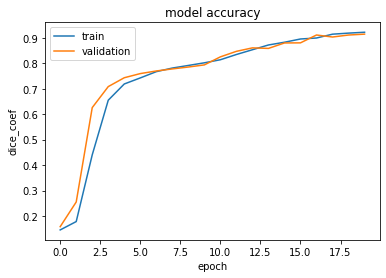

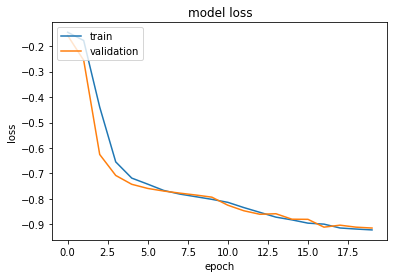

------------------------------
Loading saved weights...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
207/207 [==============================] - 4s 17ms/step
------------------------------
Saving predicted masks to files...
------------------------------
--- 915.2422704696655 seconds ---8 batch size 20 epochs


In [ ]:
from __future__ import print_function
import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import time

K.clear_session()
K.set_image_data_format('channels_last')  # TF dimension ordering in this code

# Original Image size = 384. Half size = 192
img_rows = 384
img_cols = 384

smooth = 1e-5
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def similarity(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(K.abs(y_true_f * y_pred_f))
    return ((intersection) / (K.sum(K.abs(y_true_f)+ K.abs(y_pred_f)) - intersection))



def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5), conv4])
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv3])
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    # model.load_weights('weights.h5')

    model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[similarity, dice_coef])

    return model


def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p


def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]

    print('-'*30)
    print('Loading and preprocessing validation data...')
    print('-'*30)
    imgs_validate, imgs_mask_validate = load_validate_data()

    imgs_validate = preprocess(imgs_validate)
    imgs_mask_validate = preprocess(imgs_mask_validate)

    imgs_validate = imgs_validate.astype('float32')
    mean = np.mean(imgs_validate)  # mean for data centering
    std = np.std(imgs_validate)  # std for data normalization

    imgs_validate -= mean
    imgs_validate /= std

    imgs_mask_validate = imgs_mask_validate.astype('float32')
    imgs_mask_validate /= 255.  # scale masks to [0, 1]

    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    imgs_test, imgs_id_test, imgs_mask_test = load_test_data()

    imgs_test = preprocess(imgs_test)
    imgs_mask_test = preprocess(imgs_mask_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std

    imgs_mask_test = imgs_mask_test.astype('float32')
    imgs_mask_test /= 255.  # scale masks to [0, 1]


    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

    print('-'*30)
    print('Fitting model...')
    print('-'*30)

    # Fitting model; increment epochs appropriately (default epochs=300, default batch_size=8)
    history=model.fit(imgs_train, imgs_mask_train, batch_size=8, epochs=20, verbose=1, shuffle=False,
              validation_data=(imgs_validate, imgs_mask_validate),
              callbacks=[model_checkpoint])
    


        
    # evaluate the model
    print('-' * 30)
    print('Evaluating the model on test data...')
    print('-' * 30)

    score = model.evaluate(imgs_test, imgs_mask_test)
    print('\nloss: ', score[0])
    print('dice_coef: ', score[2])
    print('similarity: ', score[1], '\n')



    # list all data in history
    print(history.history.keys())

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('model accuracy')
    plt.ylabel('dice_coef')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    # model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    imgs_mask_test_pred = model.predict(imgs_test, verbose=1)
    # np.save('imgs_mask_test.npy', imgs_mask_test_pred)

    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)
    for image, image_id in zip(imgs_mask_test_pred, imgs_id_test):
        image = (image[:, :, 0] * 255.).astype(np.uint8)
        imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)

if __name__ == '__main__':
  start_time = time.time()
  train_and_predict()
  print("--- %s seconds ---8 batch size 20 epochs" % (time.time() - start_time))
